In [2]:
# load libraries 

from scipy.ndimage import center_of_mass
from helper_functions import isolate_dart_tip
from dartboard_images import DartboardImage
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get current dir

#cur_dir = os.path.dirname(os.path.realpath(__file__))
cur_dir = os.getcwd()
parent_dir = os.path.dirname(cur_dir)
print(cur_dir)
print(parent_dir)

/Users/zach/Desktop/SDP/SmokingDartsv2/core
/Users/zach/Desktop/SDP/SmokingDartsv2


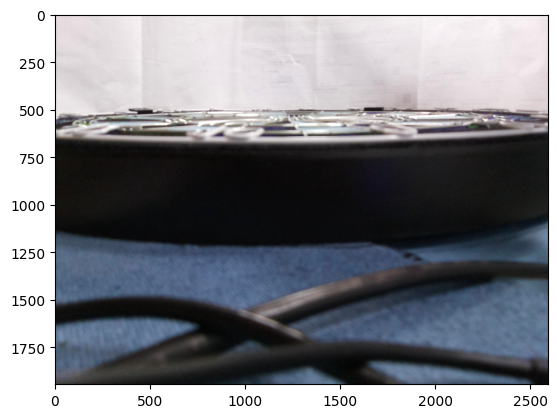

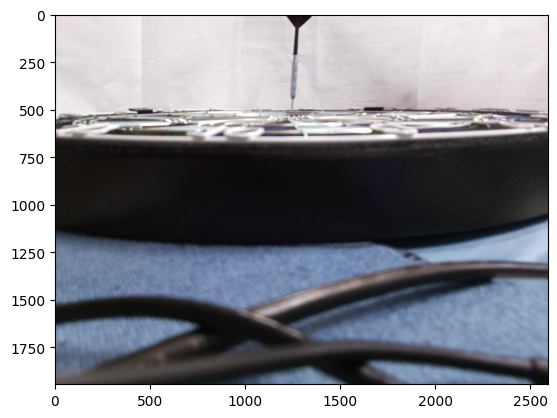

In [4]:
# load images
nodart = cv2.imread(os.path.join(parent_dir, 'images', '25.jpg'))
dart = cv2.imread(os.path.join(parent_dir, 'images', '30.jpg'))

# display images
plt.imshow(nodart)
plt.show()
plt.imshow(dart)
plt.show()

Dart tip coordinates:  1247.15 475.5


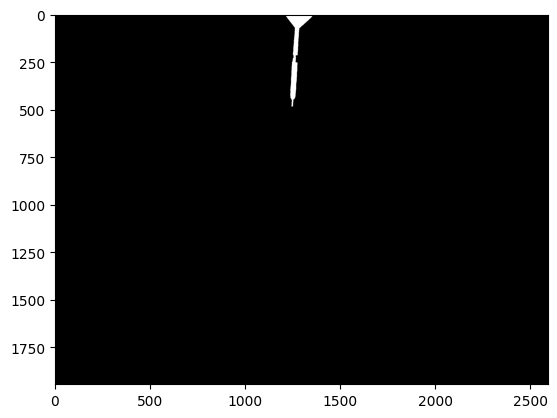

In [5]:

# dartboard image
db = DartboardImage("x", dart, last_img=nodart)
diff = db.get_diff_to_last_img()

# set bottom 3/4 of image to 0
diff[diff.shape[0]//4:, :] = 0

# opencv dilation
kernel = np.ones((5,5),np.uint8)
diff = cv2.dilate(diff.astype('uint8'),kernel,iterations = 1)

# opencv erosion
kernel = np.ones((5,5),np.uint8)
diff = cv2.erode(diff.astype('uint8'),kernel,iterations = 1)

# get the tip
isolated_dart_tip = isolate_dart_tip(diff)
y_coordinate, x_coordinate = center_of_mass(isolated_dart_tip)
print("Dart tip coordinates: ", x_coordinate, y_coordinate)

# show image diff
plt.imshow(diff, cmap='gray')
plt.show()

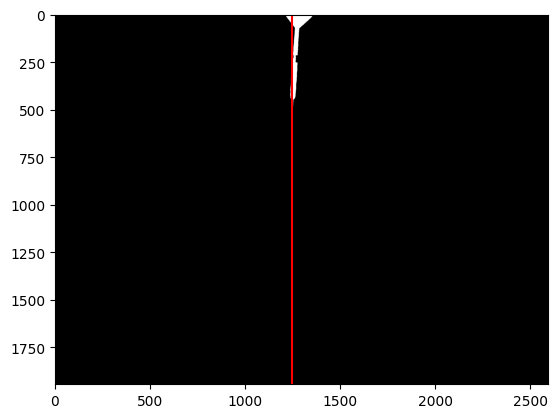

In [6]:
# draw a vertical lines through the dart tip overlaying the above image
plt.imshow(diff, cmap='gray')
plt.axvline(x=x_coordinate, color='r')
plt.show()

center_of_board = x_coordinate

Finding x-axis difference between center of board and dart tip from new image

Dart tip:  412.2495126705653
Center of Board:  1247.15
Distance from tip to COB:  834.9004873294348


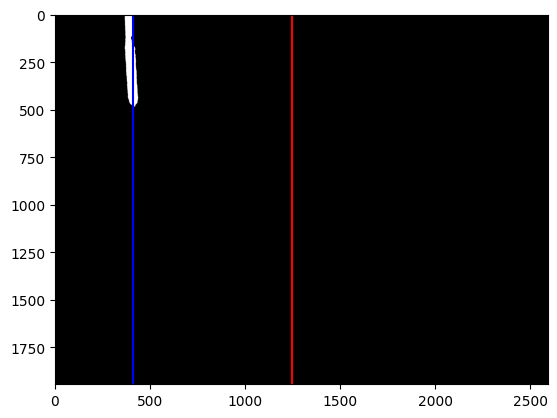

In [7]:
# load and display image
dart1 = cv2.imread(os.path.join(parent_dir, 'images', '22.jpg'))

# dartboard image
db = DartboardImage("x", dart1, last_img=nodart)
diff1 = db.get_diff_to_last_img()
# plt.imshow(diff1)
# plt.show()

# set bottom 3/4 of image to 0
diff1[diff1.shape[0]//4:, :] = 0

# opencv dilation
kernel = np.ones((5,5),np.uint8)
diff1 = cv2.dilate(diff1.astype('uint8'),kernel,iterations = 1)

# opencv erosion
kernel = np.ones((5,5),np.uint8)
diff1 = cv2.erode(diff1.astype('uint8'),kernel,iterations = 1)

# get the tip
isolated_dart_tip = isolate_dart_tip(diff1)
y_coordinate, x_coordinate = center_of_mass(isolated_dart_tip)
print("Dart tip: ", x_coordinate)
print("Center of Board: ", center_of_board)
print("Distance from tip to COB: ", abs(x_coordinate - center_of_board))

# show image diff
plt.imshow(diff1, cmap='gray')
plt.axvline(x=x_coordinate, color='b')
plt.axvline(x=center_of_board, color='r')
plt.show()

Adding hypothetical boundaries representing scoring areas to the image

Board length:  2175
1087.5
1147.15
1027.85


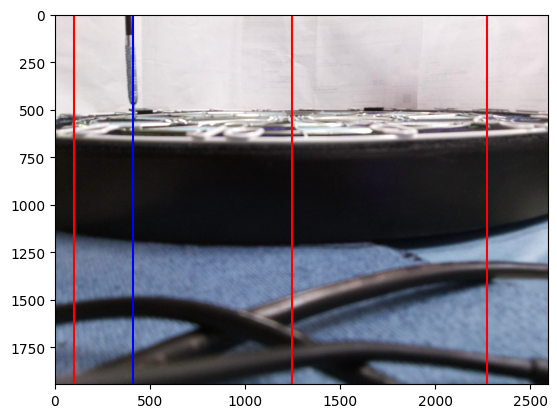

In [17]:
# load and display image
dart1 = cv2.imread(os.path.join(parent_dir, 'images', '22.jpg'))
plt.imshow(dart1, cmap='gray')
plt.axvline(x=x_coordinate, color='b')
plt.axvline(x=center_of_board, color='r')

edges_on_board = [100, 2275]
for edge in edges_on_board:
    plt.axvline(x=edge, color='r')
board_length = edges_on_board[1] - edges_on_board[0]
print("Board length: ", board_length)

print(board_length/2)
print(center_of_board-100)
print(2275-center_of_board)

plt.show()

In [9]:


import math

# x,y coordinates will eventually be inputs from sensors
x = 7.08
y = 7.06

#find the angle
angle = 1 # in degrees
theta = 0 # in radians

#find the radius
radius = math.sqrt((x**2)+(y**2))

# solve for the angle
theta = math.atan(y/x)          # in radians
angle = theta * (180/3.1415)    # convert to degrees

## What if angle is in Q3 or Q4 ##
# makes sure that the arctan angle is accurate for scoring
if y < 0:
    angle = angle + 180

# use slice.py to figure out what base number

# Quadrant 1
if 0 < angle <= 18:
    slice = 13
elif 18 < angle <= 36:
    slice = 4
elif 36 < angle <= 54:
    slice = 18
elif 54 < angle <= 72:
    slice = 1
elif 72 < angle <= 90:
    slice = 20
# Quadrant 2
if 90 < angle <= 108:
    slice = 5
elif 108 < angle <= 126:
    slice = 12
elif 126 < angle <= 144:
    slice = 9
elif 144 < angle <= 162:
    slice = 14
elif 162 < angle <= 180:
    slice = 11
# Quadrant 3
if 180 < angle <= 198:
    slice = 8
elif 198 < angle <= 216:
    slice = 16
elif 216 < angle <= 234:
    slice = 7
elif 234 < angle <= 252:
    slice = 19
elif 252 < angle <= 270:
    slice = 3
# Quadrant 4
if 270 < angle <= 288:
    slice = 17
elif 288 < angle <= 306:
    slice = 2
elif 306 < angle <= 324:
    slice = 15
elif 324 < angle <= 342:
    slice = 10
elif 342 < angle <= 360:
    slice = 6
elif angle == 0:
    slice = 6
# make sure that the score is acurrate and fits into the scoring above
else:
    while angle > 360:
        angle = angle - 360

# use multiplyer.py to figure out the multiplyer

if radius <= 0.5:
    score = 50
    print("Bullseye!!!")
elif radius > 0.5 and radius <= 2:
    score = 25
    print("Bull!!!")
elif radius >= 9.5 and radius <= 10.5:
    score = 3
    print("Triple Score!!!")
    Total = slice * score
elif radius >= 16 and radius <=17:
    score = 2
    print("Double Score!!!")
    Total = slice * score
elif radius > 17:
    score = 0
    print("Missed. Try Again.")
    Total = slice * score
else:
    score = 1
    print("Nice hit!!!")
    Total = slice * score

print(Total)
## What if angle is in Q3 or Q4 ##
if y < 0:
    angle = angle + 180


Triple Score!!!
54
